# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

plt.rcParams['figure.figsize'] = [8, 8]

image_path = Path("../Lab01/TarantulaNebula.jpg")

A = imread(image_path)

Visualize the picture

(np.float64(-0.5), np.float64(629.5), np.float64(566.5), np.float64(-0.5))

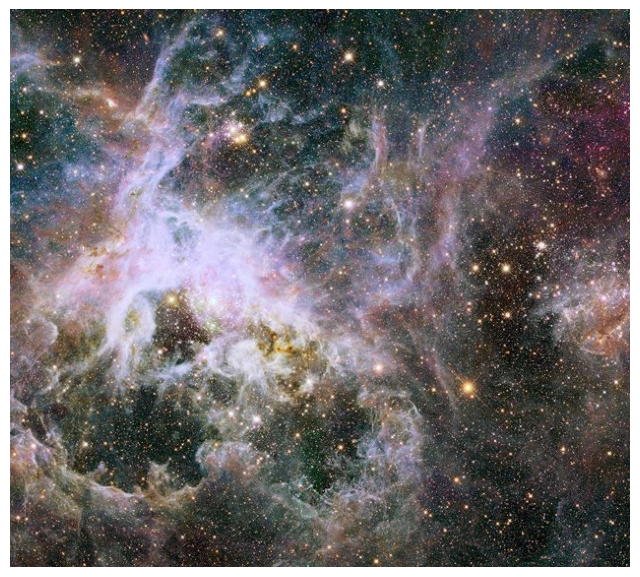

In [7]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

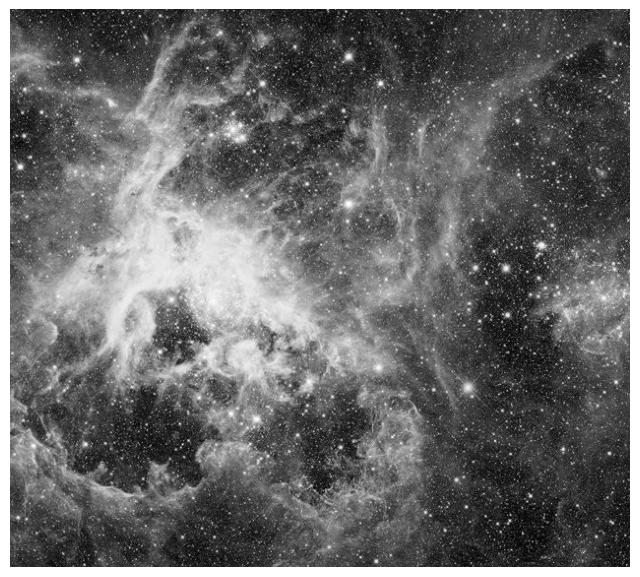

In [8]:
X = np.mean(A, axis=2)
img = plt.imshow(X)
plt.axis('off')
img.set_cmap('gray')
plt.show()

What is the picture size?

In [9]:
X.shape

(567, 630)

Perform the SVD decomposition

In [22]:
U, s, VT = np.linalg.svd(X, full_matrices = False)

U.shape, s.shape, VT.shape

((567, 567), (567,), (567, 630))

Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'Explained variance')

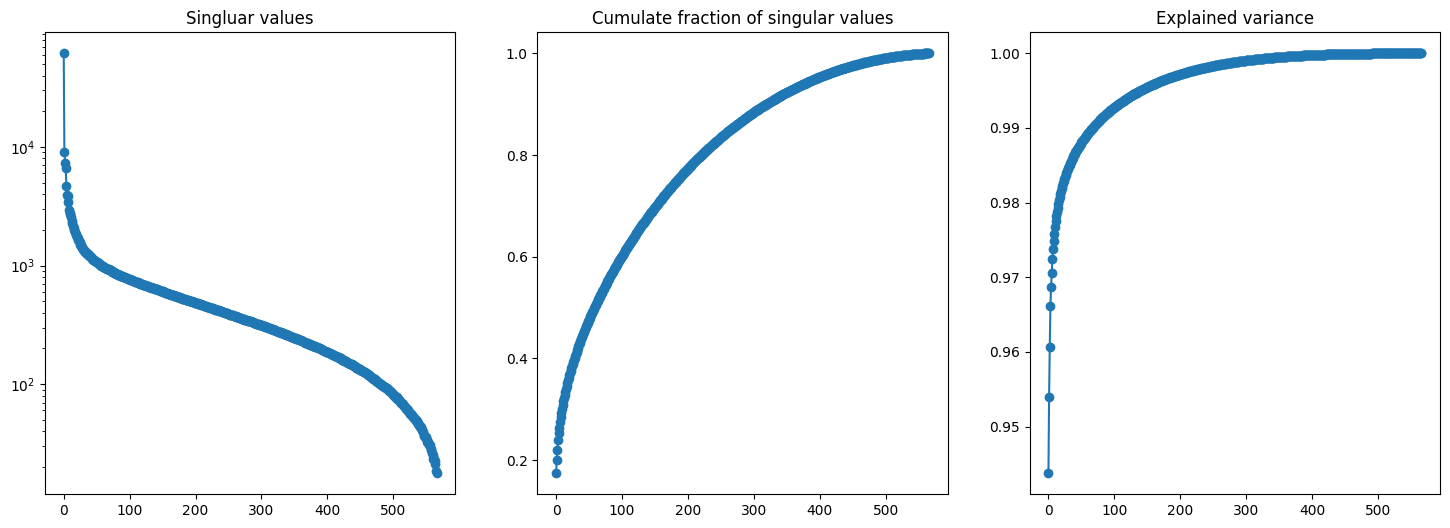

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.sqrt(np.cumsum(s**2)/np.sum(s**2)), 'o-')
axes[2].set_title('Explained variance')

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

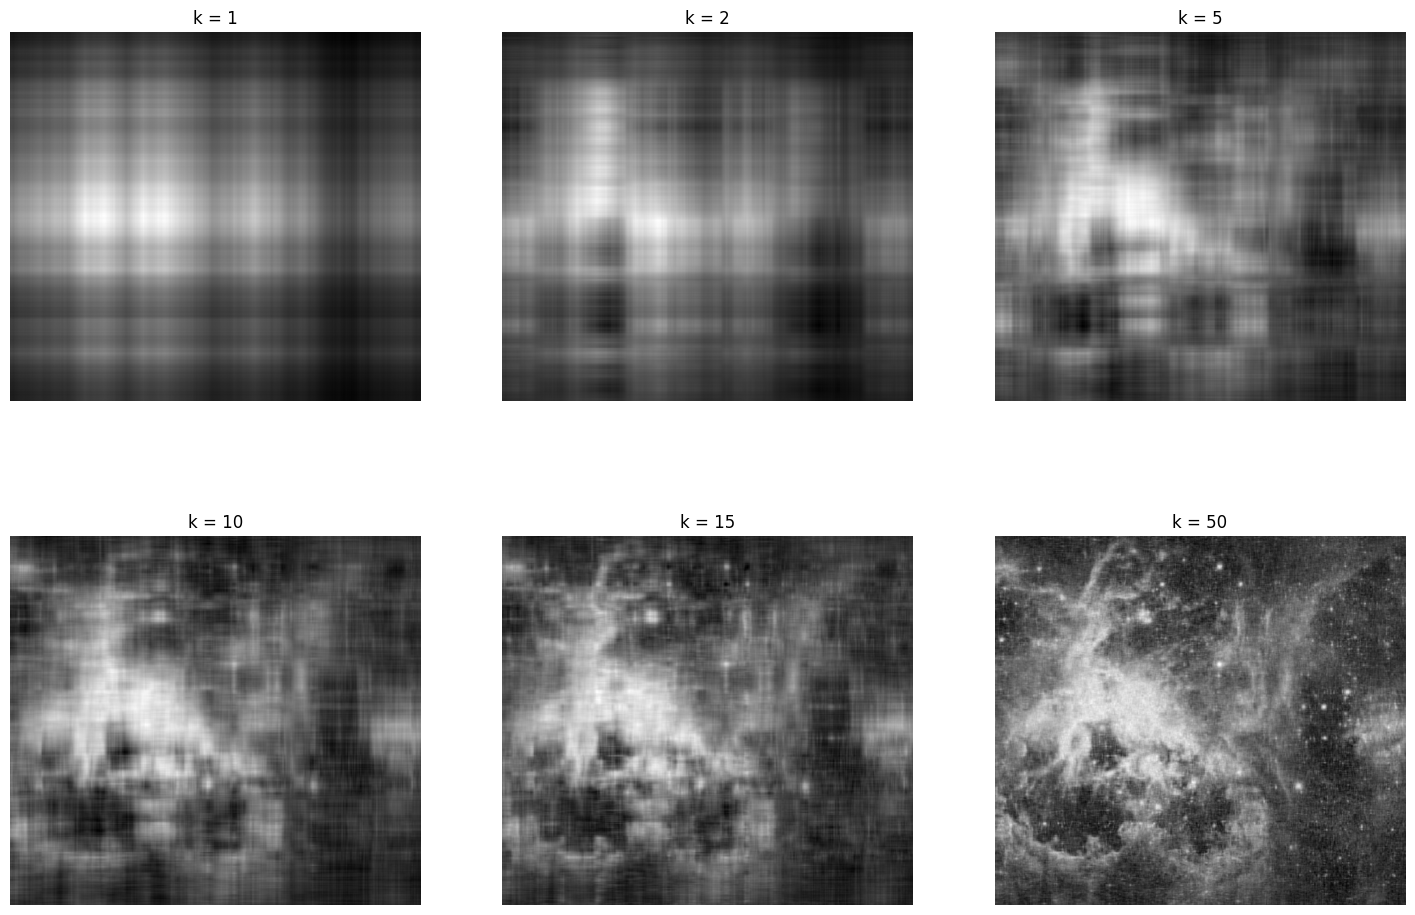

In [24]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (18,12))
axs = axs.reshape((-1,))
idxs = [1, 2, 5, 10, 15, 50]
for i in range(len(idxs)):
  k = idxs[i]
  X_k = np.matmul(U[:,:k], np.matmul(np.diag(s[:k]),VT[:k,:]))
  axs[i].imshow(X_k, cmap='gray')
  axs[i].set_title(f'k = {k}')
  axs[i].axis('off')


Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

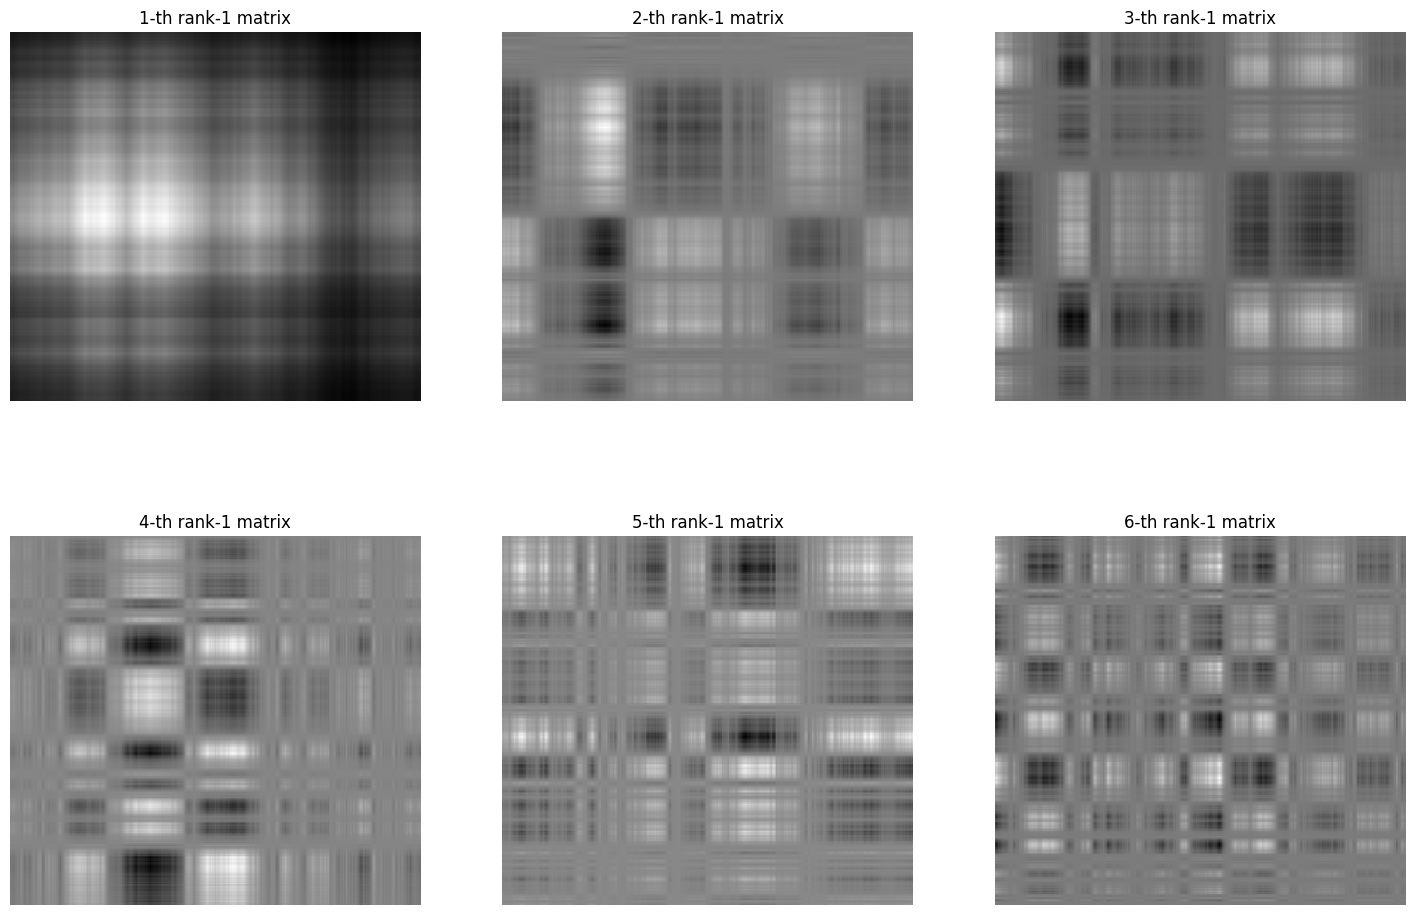

In [25]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (18,12))
axs = axs.reshape((-1,))
idxs = [1,2,3,4,5,6]
for i in range(len(idxs)):
  k = idxs[i]
  ukvk = np.outer(U[:,k - 1], VT[k - 1,:])
  axs[i].imshow(ukvk, cmap="gray")
  axs[i].set_title(f'{k}-th rank-1 matrix')
  axs[i].axis('off')


## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.

In [29]:
np.random.seed(42)

def randomized_SVD(A, k):
    m,n = A.shape

    P = np.random.randn(n, k)
    Z = A @ P
    Q, R = np.linalg.qr(Z)
    Y = Q.T @ A

    Uy, Sy, Vty = np.linalg.svd(Y, full_matrices=False)
    U = Q @ Uy
  
    return U, Sy, Vty

Set $k=100$ and compute the randomized SVD of the picture used above.

In [30]:
k = 100

rand_U, rand_S, rand_Vt = randomized_SVD(X, k)

Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.

Text(0.5, 1.0, 'Explained variance')

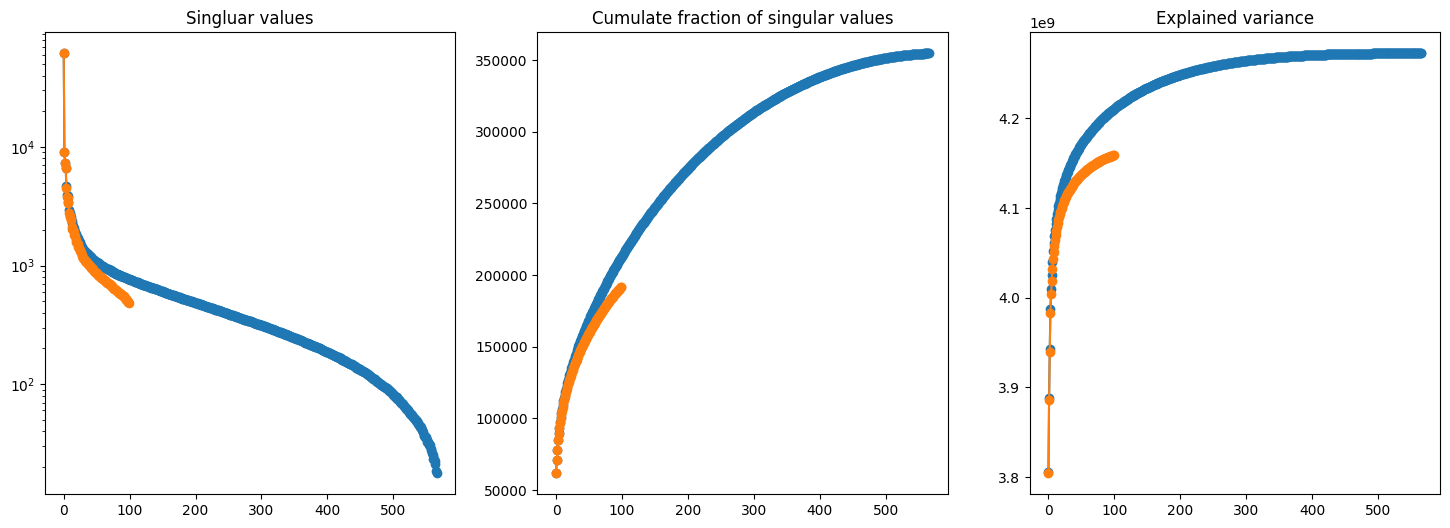

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].semilogy(s, 'o-')
axs[0].semilogy(rand_S, 'o-')
axs[0].set_title('Singluar values')

axs[1].plot(np.cumsum(s), 'o-')
axs[1].plot(np.cumsum(rand_S), 'o-')
axs[1].set_title('Cumulate fraction of singular values')

axs[2].plot(np.cumsum(s**2), 'o-')
axs[2].plot(np.cumsum(rand_S**2), 'o-')
axs[2].set_title('Explained variance')

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.

Text(0.5, 1.0, 'Original image')

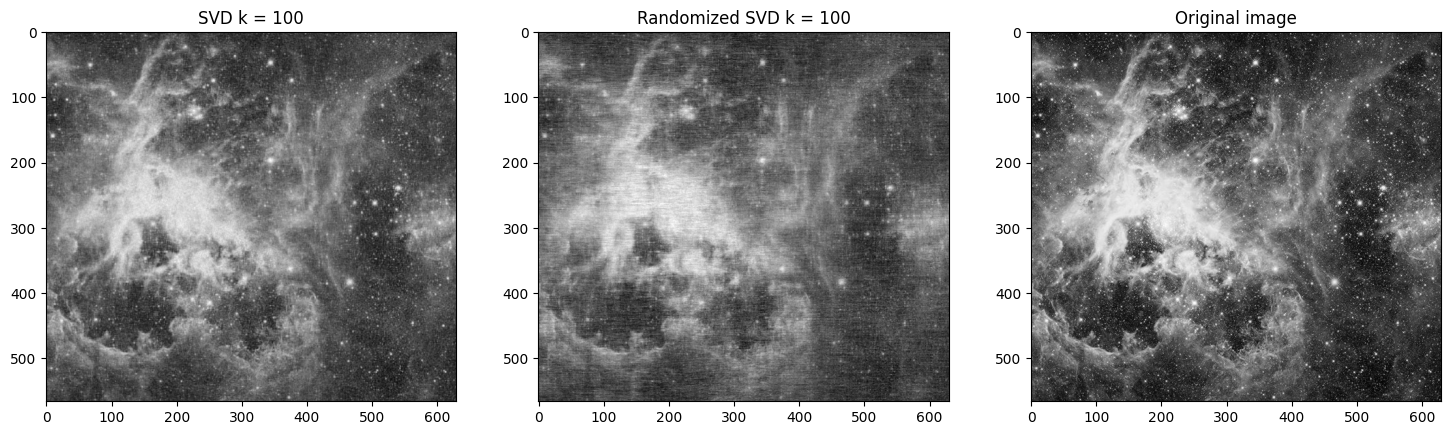

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


U, s, VT = np.linalg.svd(X, full_matrices = False)
rand_U, rand_s, rand_VT = randomized_SVD(X, k)

X_k = np.matmul(U[:,:k], np.matmul(np.diag(s[:k]),VT[:k,:]))
rand_X_k = np.matmul(rand_U[:,:k], np.matmul(np.diag(rand_s[:k]),rand_VT[:k,:]))

axs[0].imshow(X_k, cmap='gray')
axs[0].set_title(f'SVD k = {k}')

axs[1].imshow(rand_X_k, cmap='gray')
axs[1].set_title(f'Randomized SVD k = {k}')

axs[2].imshow(X, cmap='gray')
axs[2].set_title('Original image')